# importing libraries

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

# reading the dataset

In [3]:
df=pd.read_csv('creditcard.csv')
print('This data frame has {} records and {} columns.'.format(df.shape[0], df.shape[1]))
df.head()

This data frame has 284807 records and 31 columns.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# description of columns

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# getting the imbalanced percentage

In [6]:
counts = df.Class.value_counts()
print('No Frauds', round(counts[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(counts[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [7]:
one = 0
zero = 0
for i in range(0,284807):
    if(df['Class'].iloc[i] == 0):
        zero+=1
    if(df['Class'].iloc[i]==1):
        one+=1
#print(df['Class'].iloc[0])
print(zero)
print(one)

284315
492


# plot of fraud vs non-fraud transactions

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

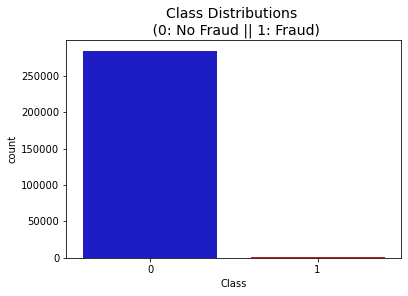

In [8]:
colors = ["#0101DF", "#DF0101"]
sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

# undersampling of dataset

In [95]:
df = df.sample(frac=1)
#print(df)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.shape

(984, 30)

# splitting the data into training and test data

In [14]:
X = new_df.iloc[:, 0:30].values
y = new_df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = np.random)
print(X_train)
print(y_train)

[[ 1.45990000e+05  5.77012552e-02 -6.28407110e-01 ...  2.24187571e-01
   2.30953239e-01  2.00000000e+01]
 [ 1.57759000e+05 -9.15149112e-01 -7.32103700e-01 ...  6.79627124e-03
   2.10200157e-01  3.60000000e+02]
 [ 6.82070000e+04 -1.31926710e+01  1.27859706e+01 ...  1.26956636e+00
   9.39407363e-01  1.00000000e+00]
 ...
 [ 3.42560000e+04  5.39275914e-01  1.55488976e+00 ...  4.18434532e-01
   2.32169715e-01  1.90200000e+01]
 [ 1.27057000e+05 -5.19021763e-01  3.16010280e-01 ...  6.81330448e-02
   1.52687491e-01  2.99400000e+01]
 [ 1.53653000e+05 -5.19249643e+00  3.16472117e+00 ... -1.74255751e+00
  -8.22159347e-02  2.47860000e+02]]
[0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1
 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0

In [147]:
one_new = 0
zero_new = 0
for i in range(0, len(y_train)):
    if(y_train[i] == 1):
        one_new += 1
    zero_new += 1
print(zero_new)
print(one_new)

787
393


In [16]:
print("No Fraud ", (one_new/(zero_new+one_new))*100)
print("Fraud ", (zero_new/(zero_new+one_new))*100)

No Fraud  33.30508474576271
Fraud  66.69491525423729


In [55]:
from sklearn import preprocessing
print(X_train)
X_train_normalized = preprocessing.normalize(X_train)
print(X_train_normalized)
X_test_normalized = preprocessing.normalize(X_test)

[[ 1.45990000e+05  5.77012552e-02 -6.28407110e-01 ...  2.24187571e-01
   2.30953239e-01  2.00000000e+01]
 [ 1.57759000e+05 -9.15149112e-01 -7.32103700e-01 ...  6.79627124e-03
   2.10200157e-01  3.60000000e+02]
 [ 6.82070000e+04 -1.31926710e+01  1.27859706e+01 ...  1.26956636e+00
   9.39407363e-01  1.00000000e+00]
 ...
 [ 3.42560000e+04  5.39275914e-01  1.55488976e+00 ...  4.18434532e-01
   2.32169715e-01  1.90200000e+01]
 [ 1.27057000e+05 -5.19021763e-01  3.16010280e-01 ...  6.81330448e-02
   1.52687491e-01  2.99400000e+01]
 [ 1.53653000e+05 -5.19249643e+00  3.16472117e+00 ... -1.74255751e+00
  -8.22159347e-02  2.47860000e+02]]
[[ 9.99999990e-01  3.95241144e-07 -4.30445307e-06 ...  1.53563647e-06
   1.58197984e-06  1.36995683e-04]
 [ 9.99997396e-01 -5.80091614e-06 -4.64063409e-06 ...  4.30799735e-08
   1.33240963e-06  2.28195578e-03]
 [ 9.99999640e-01 -1.93421001e-04  1.87458267e-04 ...  1.86134253e-05
   1.37728829e-05  1.46612465e-05]
 ...
 [ 9.99999813e-01  1.57425214e-05  4.5390281

# logistic regression model

In [58]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_test = logreg.predict(X_test)

Confusion Matrix
 [[97  1]
 [11 88]]


CLassication metrices for test set
Accuracy: 0.9390862944162437
Precision: 0.9887640449438202
Recall(Sensitivity): 0.8888888888888888
F1 Score: 0.9361702127659574


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


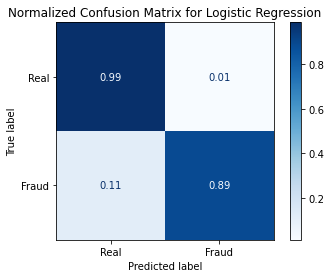

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix\n', cnf_matrix)
plt_cnf_matrix = plot_confusion_matrix(logreg, X_test, y_test,
                                       display_labels=['Real','Fraud'],
                                       cmap=plt.cm.Blues,
                                       normalize='true')
plt_cnf_matrix.ax_.set_title('Normalized Confusion Matrix for Logistic Regression')
print('\n')

In [110]:
print("Accuracy:",accuracy_score(y_test, y_pred_test))

Accuracy: 0.9390862944162437


# K-Nearest Neighbour

In [119]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

labels = ['Real','Fraud']
def classifier_performance(model,y_pred):
#     print('Classification Report: \n', classification_report(y_test,y_pred,target_names=labels))
    # Plot normalized confusion matrix
    titles_options = [("Normalized Confusion Matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(model, X_test, y_test,
                                     display_labels=labels,
                                     cmap=plt.cm.Blues,
                                     normalize='true')
        disp.ax_.set_title(title)
        print(title)
        print(disp.confusion_matrix)
    plt.show()
    return

In [112]:
print((X_test[10]))
print(labels[y_test[10]])

print(logreg.predict([X_test[10]]))

[ 8.16750000e+04  1.18091080e+00  1.79353774e-01  1.40482166e-01
  4.61832144e-01 -3.12911429e-02 -1.03402146e-01 -1.37210275e-01
  1.38523815e-01 -1.10001429e-01 -1.41113169e-01  1.44831101e+00
  5.52466752e-01 -4.74513949e-01  4.93857863e-02  7.42052928e-01
  5.09861345e-01 -5.95286884e-02 -6.39361962e-02 -1.40963538e-01
 -1.20089360e-01 -2.33653845e-01 -7.20463989e-01  1.08194100e-01
 -3.65983169e-01  1.32588171e-01  1.28561564e-01 -1.62900420e-02
  1.35754418e-02  7.99000000e+00]
Real
[0]


Text(0, 0.5, 'Accuracy')

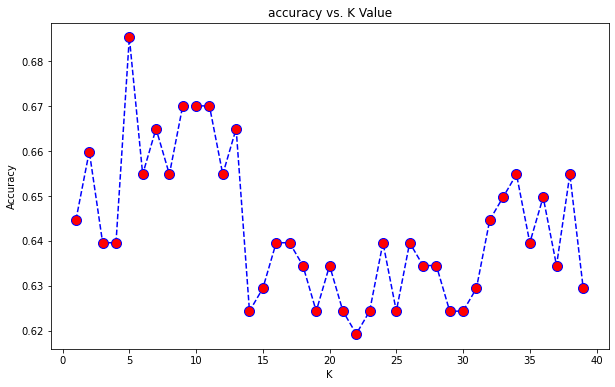

In [118]:
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
# print("Maximum accuracy:- is at K =",acc.index(max(acc)))

Text(0, 0.5, 'Error Rate')

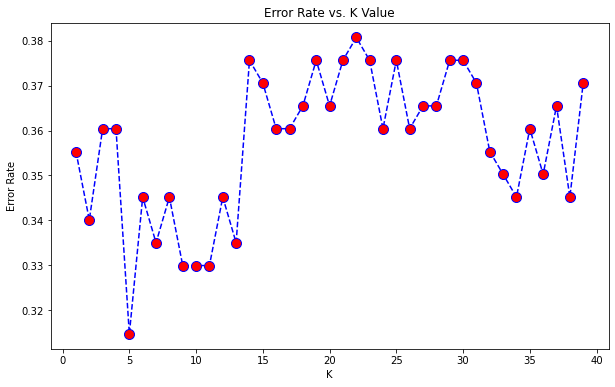

In [117]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
# print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Matrix
[[0.95918367 0.04081633]
 [0.16161616 0.83838384]]


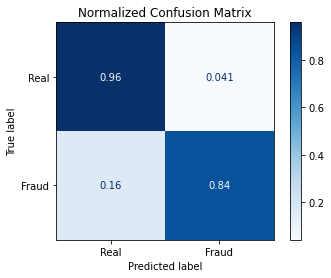

In [120]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiating the model (using the default parameters)
MODEL_KNN = KNeighborsClassifier(n_neighbors=5)

# Train the Model
MODEL_KNN.fit(X_train_normalized,y_train)

# Save the Trained Model
pickle.dump(MODEL_KNN, open('Model_KNeighborsClassifier.pkl', 'wb'))

# Predict the Trained Model on our Test data
y_pred_KNN = MODEL_KNN.predict(X_test_normalized)

# Print the Classification Report and Confusion Matrix
classifier_performance(MODEL_KNN,y_pred_KNN)

In [109]:
print(labels[y_test[0]])
print(MODEL_KNN.predict([X_test_normalized[0]]))


Fraud
[1]


In [114]:
print("KNN Accuracy:",accuracy_score(y_test, y_pred_KNN))

KNN Accuracy: 0.8984771573604061


# Gaussian Naive Bayes

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Matrix
[[0.98979592 0.01020408]
 [0.31313131 0.68686869]]


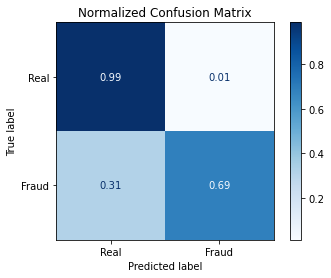

In [121]:
from sklearn.naive_bayes import GaussianNB

# Instantiating the model (using the default parameters)
MODEL_GNB = GaussianNB()

# Train the Model
MODEL_GNB.fit(X_train,y_train)

# Save the Trained Model
pickle.dump(MODEL_GNB, open('Model_GaussianNB.pkl', 'wb'))

# Predict the Trained Model on our Test data
y_pred_GNB = MODEL_GNB.predict(X_test)

# Print the Classification Report and Confusion Matrix
classifier_performance(MODEL_GNB,y_pred_GNB)

In [122]:
# Print Evaluation Metrics
print("GNB Accuracy:",accuracy_score(y_test, y_pred_GNB))

GNB Accuracy: 0.8375634517766497


# Decision Tree

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Matrix
[[0.63265306 0.36734694]
 [0.14141414 0.85858586]]


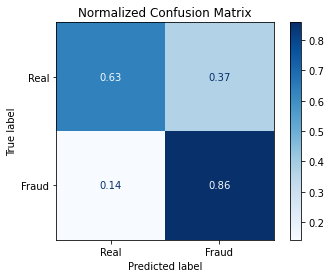

In [123]:
# Import the class
from sklearn.tree import DecisionTreeClassifier

# Instantiating the model (using the default parameters)
MODEL_DT = DecisionTreeClassifier()

# Train the Model
MODEL_DT.fit(X_train_normalized,y_train)

# Save the Trained Model
pickle.dump(MODEL_DT, open('DecisionTreeClassifier.pkl', 'wb'))

# Predict the Trained Model on our Test data
y_pred_DT = MODEL_DT.predict(X_test_normalized)

# Print the Classification Report and Confusion Matrix
classifier_performance(MODEL_DT,y_pred_DT)

In [125]:
print("DT Accuracy:",accuracy_score(y_test, y_pred_DT))

DT Accuracy: 0.9187817258883249


# Support Vector Machine

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Matrix
[[0.40816327 0.59183673]
 [0.29292929 0.70707071]]


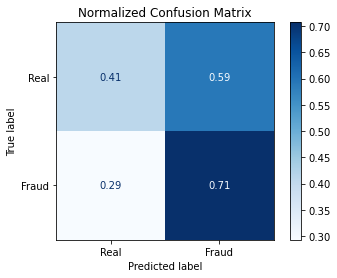

In [126]:
# Import the class
from sklearn.svm import SVC

# Instantiating the model (using the default parameters)
MODEL_SVM = SVC()

# Train the Model
MODEL_SVM.fit(X_train,y_train)

# Save the Trained Model
pickle.dump(MODEL_SVM, open('Model_SupportVectorClasifier.pkl', 'wb'))

# Predict the Trained Model on our Test data
y_pred_SVM = MODEL_SVM.predict(X_test)

# Print the Classification Report and Confusion Matrix
classifier_performance(MODEL_SVM,y_pred_SVM)

In [127]:
print("SVM Accuracy:",accuracy_score(y_test, y_pred_SVM))

SVM Accuracy: 0.5583756345177665


# XGBOOST

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Matrix
[[0.73469388 0.26530612]
 [0.05050505 0.94949495]]


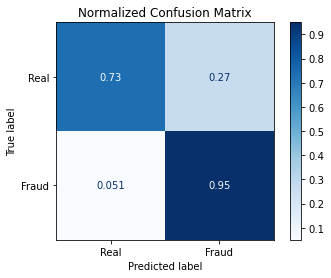

In [128]:
# Import the class
from xgboost import XGBClassifier

# Instantiating the model (using the default parameters)
MODEL_XGB = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')

# Train the Model
MODEL_XGB.fit(X_train_normalized,y_train)

# Save the Trained Model
pickle.dump(MODEL_XGB, open('Model_XGBOOSTClasifier.pkl', 'wb'))

# Predict the Trained Model on our Test data
y_pred_XGB = MODEL_XGB.predict(X_test_normalized)

# Print the Classification Report and Confusion Matrix
classifier_performance(MODEL_XGB,y_pred_XGB)

In [129]:
print("xgboost Accuracy:",accuracy_score(y_test, y_pred_XGB))

xgboost Accuracy: 0.9086294416243654


# ADABOOST

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Matrix
[[0.84693878 0.15306122]
 [0.12121212 0.87878788]]


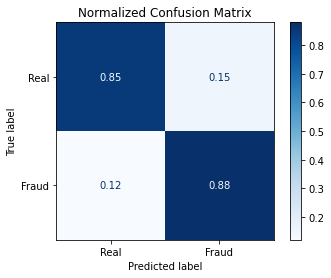

In [142]:
from sklearn.ensemble import AdaBoostClassifier

MODEL_ADB = AdaBoostClassifier(n_estimators=1000, random_state=0)

# Train the Model
MODEL_ADB.fit(X_train_normalized,y_train)

# Save the Trained Model
# pickle.dump(MODEL_ADB, open('Model_ADABOOSTClasifier.pkl', 'wb'))

# Predict the Trained Model on our Test data
y_pred_ADB = MODEL_ADB.predict(X_test_normalized)

# Print the Classification Report and Confusion Matrix
classifier_performance(MODEL_ADB,y_pred_ADB)

In [146]:
print("ADB Accuracy:",accuracy_score(y_test, y_pred_ADB))

ADB Accuracy: 0.9137055837563451


# Comparing Accuracy

Text(0.5, 1.0, 'Accuracy Comparison')

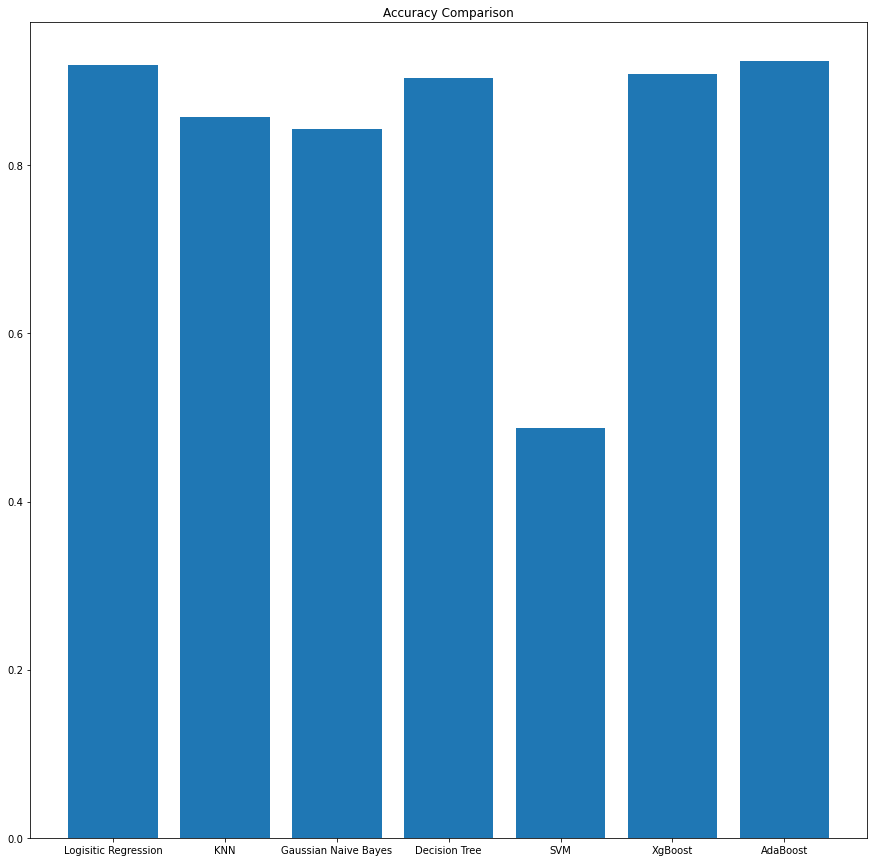

In [41]:
names = ['Logisitic Regression', 'KNN', 'Gaussian Naive Bayes', 'Decision Tree', 'SVM',  'XgBoost', 'AdaBoost']
values = [0.9187817258883249,0.8578680203045685,0.8426395939086294,0.9035532994923858,0.4873096446700508,0.9086294416243654,0.9238578680203046]

plt.figure(figsize=(15, 15))
plt.bar(names, values)
plt.title('Accuracy Comparison')